In [ ]:
#GRU -> reset gate, update gate, candidate 단계, ouput
# 데이터 로드 -> 데이터 전처리 -> 데이터 생성 -> 순환신경망 모델 및 학습
# referece : https://www.youtube.com/watch?v=LLLVYkXJw30&list=PLS8gIc2q83OhM0RTktKDitgZGX5dHo7Vs&index=23

In [30]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

In [13]:
df = pd.read_csv('samsung.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-01,3160.0,3160.0,3160.0,3160.0,2429.165527,0
1,2001-01-02,3160.0,3380.0,3140.0,3350.0,2575.222412,39455000
2,2001-01-03,3230.0,3420.0,3220.0,3370.0,2590.597656,37855000
3,2001-01-04,3790.0,3870.0,3660.0,3780.0,2905.773926,119910000
4,2001-01-05,3760.0,3920.0,3700.0,3900.0,2998.020020,78135000


In [14]:
# 이동 평균선 추가
df['MA3'] = df['Close'].rolling(window=3).mean()
df['MA5'] = df['Close'].rolling(window=5).mean()
df.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume,MA3,MA5
0,2001-01-01,3160.0,3160.0,3160.0,3160.0,2429.165527,0,NaN,NaN
1,2001-01-02,3160.0,3380.0,3140.0,3350.0,2575.222412,39455000,NaN,NaN
2,2001-01-03,3230.0,3420.0,3220.0,3370.0,2590.597656,37855000,3293.333333,NaN
3,2001-01-04,3790.0,3870.0,3660.0,3780.0,2905.773926,119910000,3500.000000,NaN
4,2001-01-05,3760.0,3920.0,3700.0,3900.0,2998.020020,78135000,3683.333333,3512.0
5,2001-01-08,3820.0,3910.0,3780.0,3880.0,2982.646484,42295000,3853.333333,3656.0
6,2001-01-09,3830.0,3860.0,3710.0,3840.0,2951.896973,46280000,3873.333333,3754.0
7,2001-01-10,3780.0,3810.0,3700.0,3710.0,2851.962891,41235000,3810.000000,3822.0
8,2001-01-11,3790.0,3790.0,3640.0,3640.0,2798.152832,31410000,3730.000000,3794.0
9,2001-01-12,3800.0,3890.0,3770.0,3840.0,2951.896973,52900000,3730.000000,3782.0


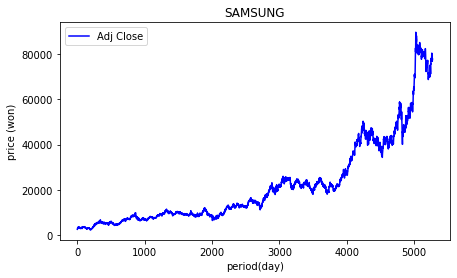

In [15]:
plt.figure(figsize=(7,4))

plt.title('SAMSUNG')
plt.ylabel('price (won)')
plt.xlabel('period(day)')

plt.plot(df['Adj Close'], label='Adj Close', color='b')
plt.legend(loc='best')

plt.show()

In [16]:
#데이터 전처리
df.describe()

,Open,High,Low,Close,Adj Close,Volume,MA3,MA5
count,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5.274000e+03,5272.000000,5270.000000
mean,25076.600303,25331.748199,24817.131210,25073.703072,21993.699442,2.049312e+07,25067.827516,25061.990133
std,19409.071918,19580.906900,19233.488996,19397.225629,19159.450580,1.284294e+07,19381.745576,19367.085429
min,2760.000000,2810.000000,2680.000000,2810.000000,2160.112061,0.000000e+00,2810.000000,2810.000000
25%,10900.000000,11025.000000,10760.000000,10885.000000,8463.249023,1.171595e+07,10906.666667,10904.000000
50%,17600.000000,17820.000000,17420.000000,17650.000000,14362.934570,1.732000e+07,17690.000000,17670.000000
75%,31315.000000,31565.000000,30935.000000,31340.000000,26897.672364,2.583650e+07,31193.333333,31297.000000
max,90300.000000,96800.000000,89500.000000,91000.000000,89771.320313,1.313050e+08,90433.333333,89960.000000


In [17]:
df['Volume'] = df['Volume'].replace(0, np.nan)

## 0으로 바뀐거 확인
for col in df.columns:
    missing_rows = df.loc[df[col] == 0].shape[0]
    print(col + ': ' + str(missing_rows))

Date: 0
Open: 0
High: 0
Low: 0
Close: 0
Adj Close: 0
Volume: 0
MA3: 0
MA5: 0


In [18]:
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume       94
MA3           2
MA5           4
dtype: int64

In [21]:
print(df.loc[df['Volume'].isna()])
print(df.loc[df['MA3'].isna()])
print(df.loc[df['MA5'].isna()])

            Date     Open     High      Low    Close     Adj Close  Volume  \
0     2001-01-01   3160.0   3160.0   3160.0   3160.0   2429.165527     NaN   
16    2001-01-23   4550.0   4550.0   4550.0   4550.0   3497.690430     NaN   
17    2001-01-24   4550.0   4550.0   4550.0   4550.0   3497.690430     NaN   
18    2001-01-25   4550.0   4550.0   4550.0   4550.0   3497.690430     NaN   
43    2001-03-01   3740.0   3740.0   3740.0   3740.0   2875.024902     NaN   
...          ...      ...      ...      ...      ...           ...     ...   
4364  2018-04-30  53000.0  53000.0  53000.0  53000.0  47383.093750     NaN   
4365  2018-05-02  53000.0  53000.0  53000.0  53000.0  47383.093750     NaN   
4366  2018-05-03  53000.0  53000.0  53000.0  53000.0  47383.093750     NaN   
4818  2020-03-09  56500.0  56500.0  56500.0  56500.0  53284.140625     NaN   
4821  2020-03-12  52100.0  52100.0  52100.0  52100.0  49134.582031     NaN   

               MA3      MA5  
0              NaN      NaN  
16 

In [23]:
df = df.dropna()
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
MA3          0
MA5          0
dtype: int64

In [24]:
# 정규화
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# 날짜를 제외한 컬럼 가져오기
scale_cols = df.columns.values.tolist()[1:]

# 정규화 수행 (0과 1사이즈 값으로) 
scaled_df = scaler.fit_transform(df[scale_cols]) 

# numpy 리턴
print(type(scaled_df))

# 정규화된 데이터 프레임 생성
scaled_df = pd.DataFrame(scaled_df, columns=scale_cols)
print(scaled_df)

<class 'numpy.ndarray'>
          Open      High       Low     Close  Adj Close    Volume       MA3  \
0     0.011423  0.011810  0.011748  0.012360   0.009564  0.594980  0.009703   
1     0.012109  0.011703  0.012670  0.012133   0.009388  0.321970  0.011644   
2     0.012223  0.011171  0.011864  0.011679   0.009037  0.352325  0.011872   
3     0.011652  0.010639  0.011748  0.010205   0.007897  0.313895  0.011149   
4     0.011766  0.010427  0.011057  0.009411   0.007283  0.239054  0.010236   
...        ...       ...       ...       ...        ...       ...       ...   
5172  0.868631  0.812746  0.870997  0.860528   0.873631  0.094455  0.864916   
5173  0.868631  0.810618  0.849113  0.845788   0.858793  0.193811  0.859589   
5174  0.844642  0.795723  0.851417  0.840118   0.853086  0.098298  0.854262   
5175  0.860635  0.804234  0.860631  0.855993   0.869066  0.115299  0.852740   
5176  0.860635  0.801043  0.857176  0.849189   0.862217  0.055050  0.853881   

           MA5  
0     0.00

In [25]:
# 입력데이터
feature_cols = ['MA3', 'MA5', 'Adj Close'] 
## 정답데이터
label_cols = ['Adj Close']  

feature_df = pd.DataFrame(scaled_df, columns=feature_cols)
label_df = pd.DataFrame(scaled_df, columns=label_cols)

print(feature_df, label_df)

           MA3       MA5  Adj Close
0     0.009703  0.007827   0.009564
1     0.011644  0.009480   0.009388
2     0.011872  0.010605   0.009037
3     0.011149  0.011385   0.007897
4     0.010236  0.011064   0.007283
...        ...       ...        ...
5172  0.864916  0.877195   0.873631
5173  0.859589  0.870768   0.858793
5174  0.854262  0.862963   0.853086
5175  0.852740  0.861816   0.869066
5176  0.853881  0.860438   0.862217

[5177 rows x 3 columns]       Adj Close
0      0.009564
1      0.009388
2      0.009037
3      0.007897
4      0.007283
...         ...
5172   0.873631
5173   0.858793
5174   0.853086
5175   0.869066
5176   0.862217

[5177 rows x 1 columns]


In [26]:
# 딥러닝 학습을 위한 넘파이로 변환
feature_np = feature_df.to_numpy()
label_np = label_df.to_numpy()

print(feature_np.shape, label_np.shape)

(5177, 3) (5177, 1)


In [27]:
#시계열 데이터 생성
def make_sequence_dataset(feature, label, window_size):
    
    feature_list = [] 
    label_list = []
    
    for i in range(len(feature) - window_size):
        
        feature_list.append(feature[i:i+window_size])
        label_list.append(label[i+window_size])
           #3차원 텐서 변환 
    return np.array(feature_list), np.array(label_list)

In [28]:
## 시계열 데이터 생성
window_size = 40

X, Y = make_sequence_dataset(feature_np, label_np, window_size)

print(X.shape, Y.shape)

(5137, 40, 3) (5137, 1)


In [29]:
## 데이터 나누기 
split = -200

x_train = X[0:split]
y_train = Y[0:split]

x_test = X[split:]
y_test = Y[split:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(4937, 40, 3) (4937, 1)
(200, 40, 3) (200, 1)


In [31]:
## GRU 모델 구축

model = Sequential()

## 은닉층
model.add(GRU(256,
               activation='tanh',
               input_shape=x_train[0].shape))

model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 256)               200448    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 200,705
Trainable params: 200,705
Non-trainable params: 0
_________________________________________________________________


In [32]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(loss='mse', optimizer='adam', metrics=['mae'])
## 특정값이 올때까지 조기 종료
early_stop = EarlyStopping(monitor='val_loss', patience=5)

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=16, callbacks=[early_stop])

Epoch 1/100
309/309 [==============================] - 7s 19ms/step - loss: 9.4356e-04 - mae: 0.0126 - val_loss: 5.3083e-04 - val_mae: 0.0194
Epoch 2/100
309/309 [==============================] - 6s 19ms/step - loss: 8.3960e-05 - mae: 0.0061 - val_loss: 2.3776e-04 - val_mae: 0.0116
Epoch 3/100
309/309 [==============================] - 6s 19ms/step - loss: 8.2739e-05 - mae: 0.0061 - val_loss: 1.9343e-04 - val_mae: 0.0105
Epoch 4/100
309/309 [==============================] - 6s 18ms/step - loss: 6.6151e-05 - mae: 0.0054 - val_loss: 1.7505e-04 - val_mae: 0.0100
Epoch 5/100
309/309 [==============================] - 6s 18ms/step - loss: 7.0230e-05 - mae: 0.0057 - val_loss: 4.7976e-04 - val_mae: 0.0189
Epoch 6/100
309/309 [==============================] - 6s 18ms/step - loss: 6.1403e-05 - mae: 0.0053 - val_loss: 2.9978e-04 - val_mae: 0.01411662
Epoch 7/100
309/309 [==============================] - 5s 18ms/step - loss: 5.7392e-05 - mae: 0.0051 - val_loss: 3.3516e-04 - val_mae: 0.0153
Ep

In [33]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 8ms/step - loss: 4.3195e-04 - mae: 0.0185


[0.000431952066719532, 0.018462426960468292]

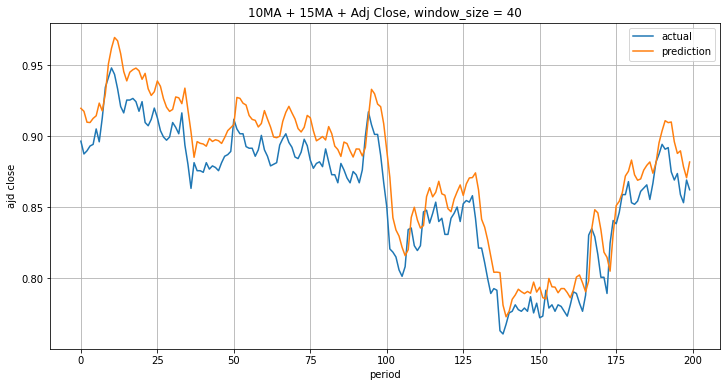

In [34]:
pred = model.predict(x_test)

plt.figure(figsize=(12,6))
plt.title('10MA + 15MA + Adj Close, window_size = 40')
plt.ylabel('ajd close')
plt.xlabel('period')
plt.plot(y_test, label='actual')
plt.plot(pred, label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()